In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
     

In [3]:
# print 1st five values
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
     

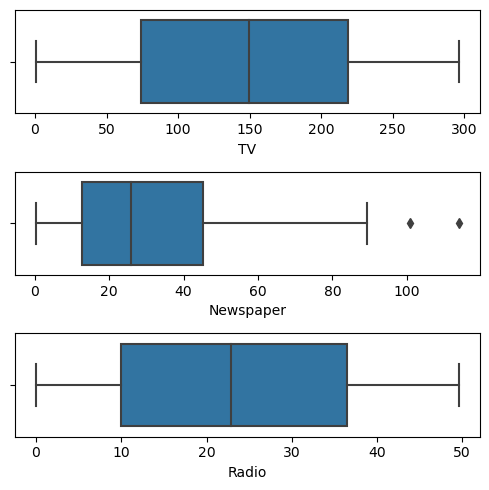

In [8]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()
     

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

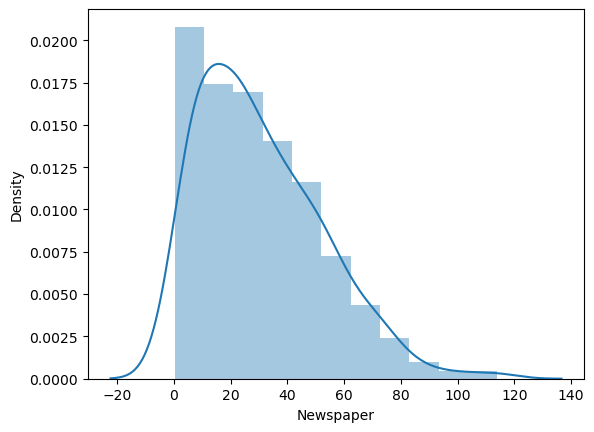

In [9]:
sns.distplot(df['Newspaper'])
     

In [10]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [11]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)
     

-35.775000000000006
93.625


In [12]:
data = df.copy()

<AxesSubplot:xlabel='Newspaper'>

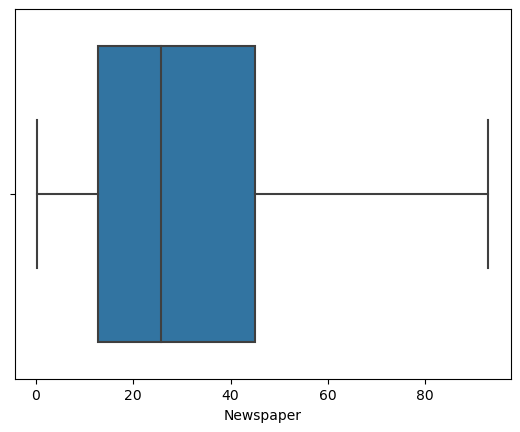

In [13]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93
     

sns.boxplot(data['Newspaper'])
     

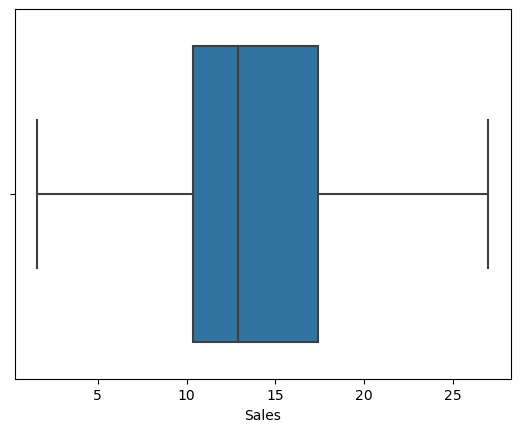

In [14]:
sns.boxplot(data['Sales']);

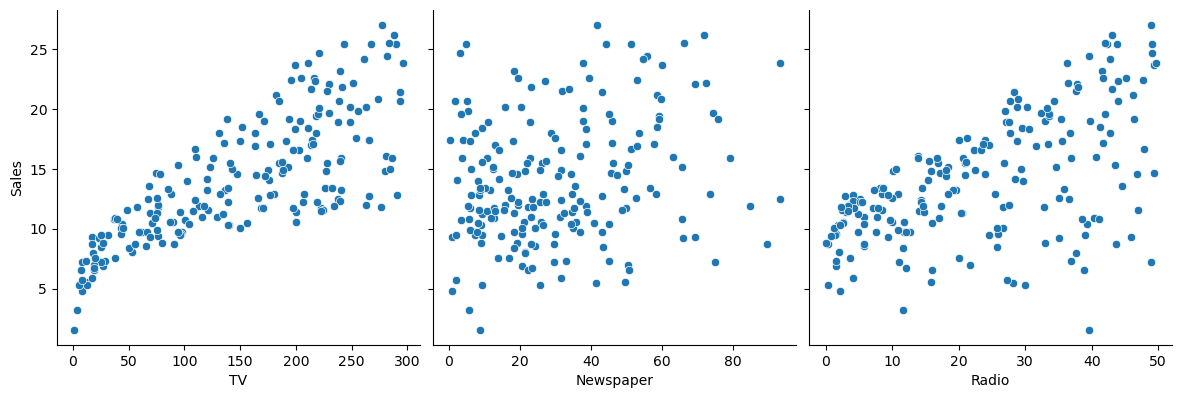

In [15]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()
     

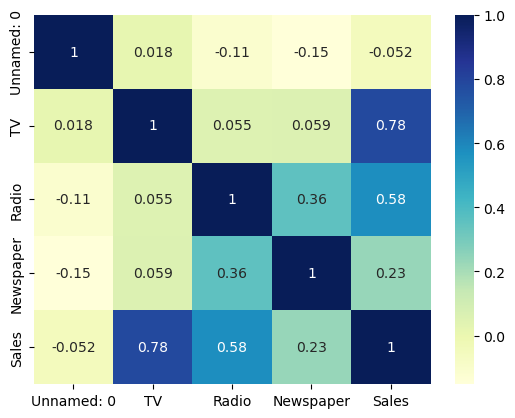

In [16]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [17]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [18]:
print(important_features)

['TV', 'Radio', 'Sales']


In [19]:
X = data['TV']
y = data['Sales']
     

In [20]:
X = X.values.reshape(-1,1)
     

In [21]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [22]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [23]:
print(X.shape,y.shape)
     

(200, 1) (200,)


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)
     


In [25]:
print(X_train.shape,y_train.shape)
     

(134, 1) (134,)


In [26]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [28]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)
print(knn_train_pred, knn_test_pred)

[ 4.84 11.46 10.88 14.36 13.74 16.32 20.2  15.9  12.7  17.5   9.64 17.5
 16.28 16.52  5.64 13.22 17.18  7.78 10.98 14.82 19.6  16.38 19.6  13.56
 13.5  17.78 10.38  6.96 22.22 15.2   9.94 17.48 10.88 17.54 13.58 22.22
 22.22 16.46 20.68  9.94 14.66 17.54  9.98 16.38  8.26 17.78 14.2   9.9
 20.38 16.28 20.68 17.78  5.64 15.14  8.26 11.04  9.64 16.32 10.86 10.38
 13.56 15.46 14.2  14.76  8.26  7.02  4.84 17.68 17.5  16.52 16.32  9.94
 14.2  11.14 14.68  8.26 20.62 20.14 10.88 11.46 14.82 12.94 15.78 13.04
 17.78 13.24 10.96 16.32 17.26 15.9   9.98 16.38  9.98 11.04 13.5  12.84
 18.26  9.94 18.76 20.14 16.28 20.68 20.2   7.78 11.46 12.94 10.98 13.38
 15.28  6.96 13.56 20.14 10.44  7.02  7.78  7.78  8.26 17.68 14.4  17.66
 18.76 11.   14.38 13.5  10.96 10.86 11.46 11.04  7.02 13.5  17.26 16.82
 19.12 20.78] [12.7  11.46 10.44 17.62 19.08 20.14 17.58  6.32 10.98 13.5   5.64 17.78
 20.2  11.04 17.5  12.94 15.14  8.26 10.98 15.2  15.48  9.32 10.38 16.38
 11.14 16.38 20.68 12.58 16.82 16.86 16

In [29]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])
 

In [30]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5356994419706086
RMSE: 3.7338411451171423


In [31]:
Results.head()
     

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.682926,0.535699,3.733841,0.147227


In [32]:
svr = SVR().fit(X_train,y_train)
svr
SVR()
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)
print(svr_train_pred,svr_test_pred)
     

[ 7.95575741 10.33715418 10.65248553 17.3469178  12.95739358 14.37064763
 17.08632524 15.00880979 11.77112578 16.27856659  9.12993428 16.28857896
 15.70559473 17.53206803  7.99512551 13.04113981 15.41882749  8.15728581
 11.50128895 14.80141226 16.95307559 17.75236248 16.94891204 12.37137991
 13.22618109 17.89223483  9.89781582  8.07119394 17.2621482  13.55601171
  8.96925764 15.32063823 10.64820227 15.5437977  12.25334025 17.38233123
 17.17006594 17.48102586 17.44283853  8.90390285 14.02028679 15.5437977
  9.61217685 17.7576552   8.41729119 17.8833591  13.67308462  9.36893112
 17.87017051 15.73239373 17.618767   17.86608075  7.99370528 17.29278569
  8.39684451 10.61383675  9.12540807 14.43453886 11.6991414  10.81320611
 12.403179   14.74161384 13.76217803 16.53272837  8.48421911  8.22351645
  7.92712468 17.78430545 16.21306766 17.51539574 14.38127486  8.91255531
 13.67800561 11.19862569 15.11277766  8.356988   17.0706125  17.8986698
 10.65248553 10.30128465 14.86678845 11.9684329  15.9

In [33]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5612046868276812
RMSE: 3.6298378454863527


In [34]:
Results.head()
     

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.682926,0.535699,3.733841,0.147227
1,Support Vector Machine,0.587556,0.561205,3.629838,0.026351


In [35]:
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant).fit()
model.params

const    6.948519
x1       0.048215
dtype: float64

In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     217.1
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.16e-29
Time:                        20:18:27   Log-Likelihood:                -341.98
No. Observations:                 134   AIC:                             688.0
Df Residuals:                     132   BIC:                             693.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9485      0.539     12.901      0.0

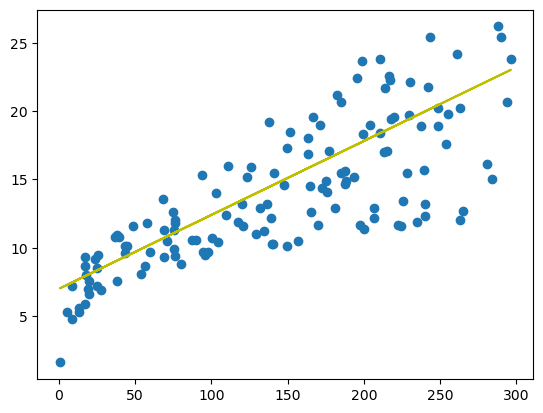

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()
     

In [38]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res
     

78    -1.908883
18     1.014969
80     1.167818
122   -6.148788
90    -2.223859
         ...   
116   -1.460115
167   -4.719481
50    -5.181973
133    2.053717
176    1.274754
Name: Sales, Length: 134, dtype: float64

In [39]:
y_train_pred

array([ 7.20888308, 10.28503094, 10.63218242, 17.74878781, 13.42385892,
       14.82210795, 17.40163633, 15.39105066, 11.99185906, 16.53857917,
        9.02660681, 16.54822227, 16.00820885, 18.04290226,  7.36799417,
       13.51546834, 15.75266679,  7.76336114, 11.64952912, 15.20783182,
       17.24252523, 18.51059245, 17.23770368, 12.7440206 , 13.71315183,
       19.54722535,  9.82216229,  7.5801423 , 21.10458548, 14.05066021,
        8.85303107, 15.66587892, 10.62736087, 15.8635624 , 12.59937415,
       20.91654509, 21.23958883, 17.95611439, 20.81529257,  8.78070785,
       14.49906421, 15.8635624 ,  9.52804784, 18.5250571 ,  8.18283585,
       19.62437013, 14.16637737,  9.27732733, 18.94453181, 16.03231659,
       20.48260574, 19.73526574,  7.36317262, 17.67164304,  8.15390656,
       10.58878848,  9.02178526, 14.87996653, 11.90024964, 10.81540126,
       12.78259299, 15.15479479, 14.25316524, 16.78929969,  8.27444527,
        7.88389985,  6.9822703 , 18.60220187, 16.47589904, 18.01

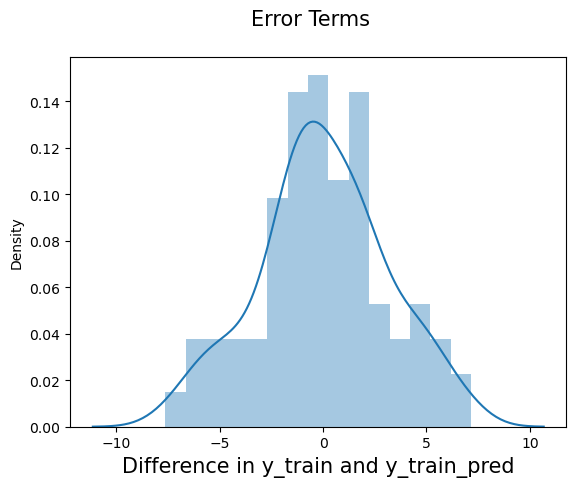

In [40]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

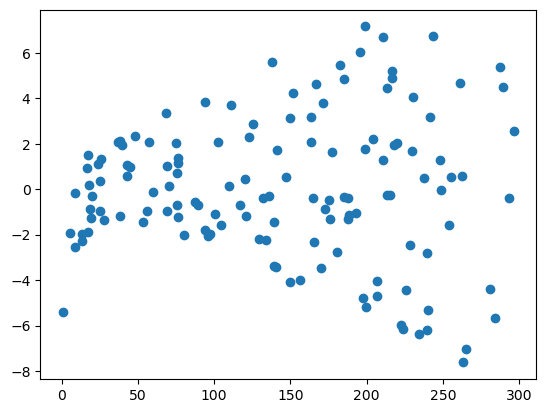

In [41]:
plt.scatter(X_train, res)
plt.show()
     

In [42]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
y_pred

array([12.12686241, 10.21752926,  9.09410849, 18.13933323, 20.2897438 ,
       17.30038381, 16.28785865,  7.51264062, 11.63506448, 13.66493634,
        7.35352953, 19.81723206, 17.4787811 , 10.5502161 , 16.47589904,
       12.24257957, 17.67164304,  8.24069443, 11.586849  , 20.14509735,
       15.06800692,  8.4673072 , 10.71897029, 18.515414  , 11.20594667,
       18.43344768, 20.62243064, 13.83851208, 16.58197311, 17.05448485,
       16.1624984 , 17.90307736, 15.48266008, 13.46725286,  8.3274823 ,
       16.83269362,  7.3004925 , 20.51635657, 17.57039052, 10.13556294,
       21.07083464, 17.48360265,  7.85014901, 20.96476057, 10.48753597,
       20.2993869 , 11.08058642, 19.04578432,  7.14620295,  9.35929365,
       12.39204757, 16.71215491, 12.54151557, 17.94164975,  7.32460024,
       18.5250571 , 10.17413532, 12.75848525, 19.75455193, 17.58003362,
       20.45849799,  9.9523441 , 20.7381478 , 11.30719919, 18.39487529,
       13.26956938])

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

3.5055547150841875

In [44]:
r2 = r2_score(y_test, y_pred)
r2

0.5907383682755771

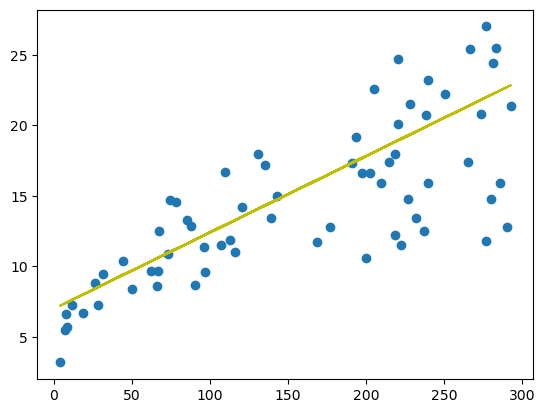

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()